# Task 1: Changing from adjacency list to adjacency matrix

In [1]:
graph = [
    [False, True, False, False, False, False, False],
    [False, False, False, True, False, False, True],
    [False, False, False, True, False, False, False],
    [False, False, False, False, False, True, False],
    [False, False, True, True, False, False, False],
    [False, False, False, False, False, False, False],
    [False, False, False, False, True, False, False]
]

stringToIndex = {
    '1' : 0,
    '2' : 1,
    '3' : 2,
    '4' : 3,
    '5' : 4,
    '6' : 5,
    '7' : 6
}

indexToString = {
    0 : '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7'
}

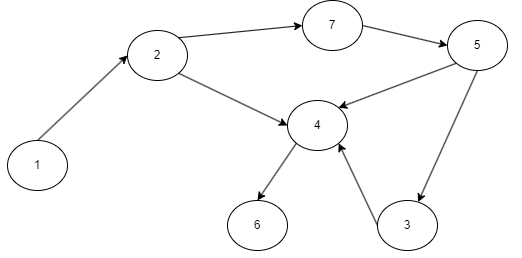

In [2]:
from IPython.display import Image
Image(filename='graph.png') 

### Breadth-first traversal

In [3]:
def BFS(graph, stringToIndex, indexToString, s):
    visited = set()
    queue   = set() 
    visited.add(s) 
    queue.add(s)
    
    while queue:
        u = queue.pop()
        
        print(u, "-->", end="")
        
        nodePosition = stringToIndex[u]
        for index, item in enumerate(graph[nodePosition]):
            neighbor = indexToString[index]
            if neighbor not in visited and item:
                visited.add(neighbor)
                queue.add(neighbor)

BFS(graph, stringToIndex, indexToString, '1')            

1 -->2 -->7 -->5 -->3 -->4 -->6 -->

### Depth-first traversal

In [4]:
visited = set()

def DFS(graph, stringToIndex, indexToString, s):
    if s not in visited:
        print(s, "--->", end="")
        visited.add(s)
        nodePosition = stringToIndex[s]
        # print(nodePosition)
        for index, value in enumerate(graph[nodePosition]):
            neighbor = indexToString[index]
            if value:
                DFS(graph, stringToIndex, indexToString, neighbor)

In [5]:
DFS(graph, stringToIndex, indexToString, '1')   

1 --->2 --->4 --->6 --->7 --->5 --->3 --->

In [6]:
#adjacency list

graph = {
    '1' : ['2'],
    '2' : ['4', '7'],
    '3' : ['4'],
    '4' : ['6'],
    '5' : ['3', '4'],
    '6' : [],
    '7' : ['5']
}

visited = set()

def DFS(graph, s):
    if s not in visited:
        print(s, "--->", end="")  #our answer
        visited.add(s)
        for neighbor in graph[s]:
            DFS(graph, neighbor)
              
DFS(graph, '1')                

1 --->2 --->4 --->6 --->7 --->5 --->3 --->

# Task 2: Case Study

### Case Study: Social Network

Since graphs are generally used in social network platforms to keep a record of user friends, it was used as a case study for task 2. For this case study, two different scenarios were considered. The first scenario is checking a friendship path between two users and the second is listing mutual friends. Since the social network graph is expected to be sparse (since every user knows only a fraction of all users registered), an adjacency list is used.

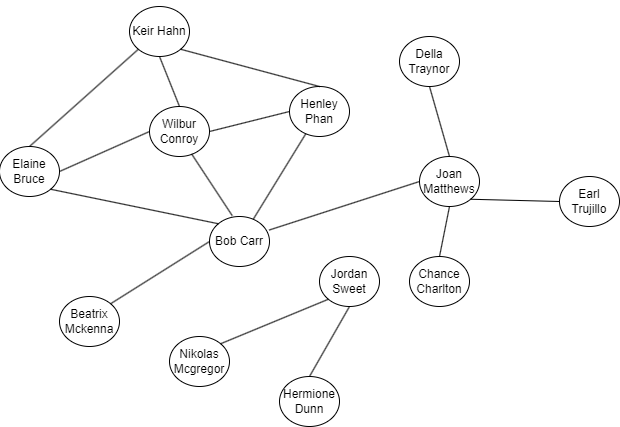

In [7]:
Image(filename='social network graph.png') 

#### Use Scenario 1: Checking if a friendship path exists between two users

This scenario was inspired by the book 'Cracking the Coding Interview' by Gayle McDowell, where it was listed as an application of pathfinder under BFS (bread-first search), after finding it to be a good application demonstration for BFS. In this, it is checked if a path between two users exists. In this case, BFS is preferred over DFS (depth-first search). The main reason is due to the expectation of the social network graph to be very large. For example, we wish to determine if there is a path between Joan Matthews and Chance Chariton. Using DFS, we can have one potential route, Joan Matthews --> Bob Carr --> ... . But, from the social network graph, it can be seen that Joan Matthews has a direct path with Chance Chariton as they are friends. From this, it is can be seen that a path eventually is found by DFS but it would take much longer than BFS. Hence, we would like to search as close to the given user.

In [8]:
graph = {
    'Elaine Bruce' : ['Keir Hahn', 'Wilbur Conroy', 'Bob Carr'],
    'Keir Hahn' : ['Elaine Bruce', 'Henley Phan', 'Wilbur Conroy'],
    'Wilbur Conroy' : ['Elaine Bruce', 'Henley Phan', 'Keir Hahn', 'Bob Carr'],
    'Henley Phan' : ['Keir Hahn', 'Bob Carr', 'Wilbur Conroy'],
    'Bob Carr' : ['Beatrix Mchenna', 'Elaine Bruce', 'Henley Phan', 'Joan Matthews', 'Wilbur Conroy'],
    'Beatrix Mchenna' : ['Bob Carr'],
    'Joan Matthews' : ['Della Traynor', 'Chance Carlton', 'Earl Trujillo'],
    'Della Traynor' : ['Joan Matthews'],
    'Chance Carlton' : ['Joan Matthews'],
    'Earl Trujillo' : ['Joan Matthews'],
    'Nikolas Mcgregor' : ['Jordan Sweet'],
    'Jordan Sweet' : ['Nikolas Mcgregor', 'Hermione Dunn'],
    'Hermione Dunn' : ['Jordan Sweet']
}


In [9]:
def friendShipPathBFS(graph, s, target):
    # checking if user exits in social network graph
    if s not in graph or target not in graph:
        print("One or both users do not exist in social network graph")
        return
    visited = set()
    queue   = set()      
    visited.add(s)
    queue.add(s)
    
    while queue: # continue as long as queue is not empty
        u = queue.pop()
        if u == target:
            return True
        
        # visit all neighboring nodes
        for neighbor in graph[u]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.add(neighbor)  
    return False

##### Check if a path of friendship exists between Henley Phan and Elaine Bruce

In [10]:
friendShipPathBFS(graph, 'Elaine Bruce', 'Henley Phan')

True

##### Check if a path of friendship exists between Elaine Bruce and Hermione Dunn

In [11]:
friendShipPathBFS(graph, 'Elaine Bruce', 'Hermione Dunn')

False

#### Use Scenario 2: Checking for mutual friends

In this scenario, a list of friends is determined which is common to two users who are friends themselves. Since neighboring nodes will be checked, BFS is suitable for this scenario (only up to the first neighbor traversal).

In [12]:
def mutualFriendsBFS(graph, s, t):
    # checking if user exits in social network graph
    if s not in graph or t not in graph:
        print("One or both users do not exist in social network graph")
        return
    
    neighboringNodes = set()
    mutualFriends = []
    for neighbor in graph[s]: # visit all neigbhoring nodes
        neighboringNodes.add(neighbor)
    print(neighboringNodes)
    
    if t not in neighboringNodes: # checking if two given users are friends
        print("Two given users are not friends")
    else:
        for neighbor in graph[t]: # checking if user exits in social network graph
            if neighbor in neighboringNodes: # checking if two users have common friends
                mutualFriends.append(neighbor)
    
    return mutualFriends 

In [13]:
mutualFriends = mutualFriendsBFS(graph, 'Elaine Bruce', 'Wilbur Conroy')
mutualFriends

{'Wilbur Conroy', 'Bob Carr', 'Keir Hahn'}


['Keir Hahn', 'Bob Carr']